#가우시안 나이브 베이즈 실습

In [2]:
#가우시안 나이브 베이즈를 활용한 붓꽃 분류
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [6]:
# iris data 불러오기
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'viginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
#데이터 시각화
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
viginica_df = df[df.target == 'viginica']

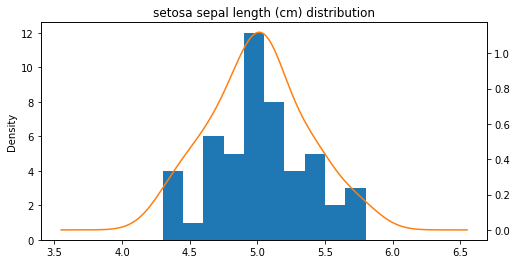

In [21]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax= ax, secondary_y = True, 
                                    title = 'setosa sepal length (cm) distribution',
                                    figsize = (8,4))

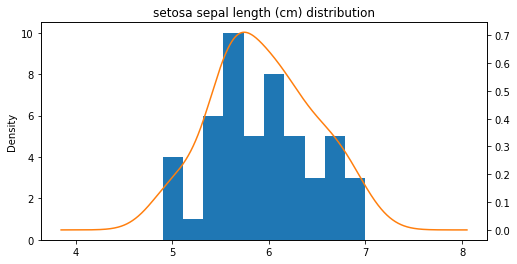

In [22]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', ax= ax, secondary_y = True, 
                                    title = 'setosa sepal length (cm) distribution',
                                    figsize = (8,4))

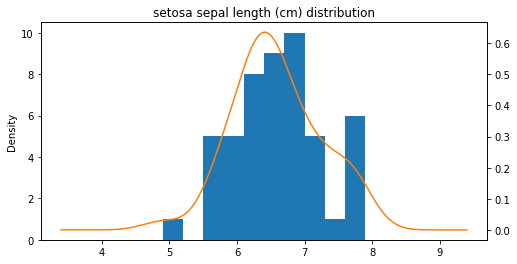

In [23]:
ax = viginica_df['sepal length (cm)'].plot(kind='hist')
viginica_df['sepal length (cm)'].plot(kind='kde', ax= ax, secondary_y = True, 
                                    title = 'setosa sepal length (cm) distribution',
                                    figsize = (8,4))

In [24]:
#데이터에 사용될 모든 특징들이 정규분포에 가까운 분포도를 보인다

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

In [29]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [31]:
accuracy_score(y_test, predicted)

0.9666666666666667

#베르누이 나이브 베이즈 실습

In [32]:
#베르누이 나이브 베이즈를 활용한 스팸 분류
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [33]:
#dataset 
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]
df = pd.DataFrame(email_list)

In [49]:
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [34]:
#나이브 베이즈 분류기는 숫자만 다루기 때문에 T/F를 1과 0으로 치환
df['label'] = df['spam'].map({True:1, False:0})

In [37]:
df_x =df['email title']
df_y =df['label']

In [38]:
#베르누이 나이브 베이즈의 입력 데이터는 고정된 크기의 벡터여야 한다. 
#사이킷런의 CountVectorizer를 이용하면 간편하게 특정 데이터 안의 모든 단어를 포함한 고정 길이 벡터를 만들 수 있다. 
cv = CountVectorizer(binary=True)
x_traincv = cv.fit_transform(df_x)

In [39]:
encoded_input=x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]])

In [42]:
#고정된 크기의 벡터
print(cv.inverse_transform(encoded_input[0]))
print(cv.inverse_transform(encoded_input[1]))

[array(['free', 'game', 'only', 'today'], dtype='<U9')]
[array(['cheapest', 'deal', 'flight'], dtype='<U9')]


In [43]:
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [44]:
#스무딩
#학습데이터에 없던 단어가 실제 상황에서 나타나게 되면 확률이 0이 되어 스팸 분류가 힘들어 지는데 이런경우 학습 데이터에 없던 데이터가 출현해도
#빈도수에 1을 더해서 확률이 0이 되는 현상을 방지

In [46]:
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [56]:
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_traincv, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [57]:
# test data
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]
test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1,False:0})
test_x=test_df["email title"]
test_y=test_df["label"]
x_testcv=cv.transform(test_x)

In [58]:
predictions = bnb.predict(x_testcv)

In [60]:
accuracy_score(test_y, predictions)

0.8333333333333334

#다항분포 나이브 베이즈 실습


In [62]:
#영화리뷰 긍정/부정
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [63]:

review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [64]:
df['label']= df['type'].map({'positive' :1, 'negative':0})

In [66]:
df.head()

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1


In [67]:
df_x = df['movie_review']
df_y = df['label']

In [69]:
cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
encoded_input = x_traincv.toarray()

In [74]:
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [76]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [78]:
# cv.get_feature_names()

In [79]:
mnb = MultinomialNB()
y_train = df_y.astype('int')
mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [80]:
# test data
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]
test_df = pd.DataFrame(test_feedback_list)
test_df['label'] = test_df['type'].map({"positive":1,"negative":0})
test_x=test_df["movie_review"]
test_y=test_df["label"]

In [81]:
x_testcv = cv.transform(test_x)
predictions = mnb.predict(x_testcv)

In [82]:
accuracy_score(test_y, predictions)

1.0